In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fer2013:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F28577%2F36420%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T155614Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7e8ef0161be6c5f347bc4e7a524bfe8dd2171a35d0746a238df98ac10b843e831bdcba55b6d95323963c42beda474ebaeafefdfc323fe16584c0de265defb67e425b7fbf8838693a803f28e5a4864fb9726ce308b76fe31303955d6ba59dfe586db7ef74f170b3827c29daf7226c1bb99d33b2d29435dec579b79ea9e16bf2aec526f784686565c8121ac2c89358cd1fe6fff43bd6177c31caca65450c962856ac6fe4d313e9b54baf71f6c2dacaa1f94d18ed2ad0fb7bbd2698b9f76850a06cc4c8d548d162888a9eeb302b00aafb375e796f977f254257cda79d7e9c60e4b7e7db1e7bc150c8306de54080a66ec95d01ebae5b7241effc8e5976102768520d,loan-finder-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5543826%2F9173434%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T155615Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1963134ef2cc9b7beacb0931d8245cc0754805a0440d1add7cabf4cfe2c6679f59e2d4d016f004698d8cef4aed9cd5bf4de60a2a667c2e2a22b41bf653a90a8f123d318c74042395978a01b4a6d325bf6b75ab51fd1a4751878b8816223615553156ff95ae691fb87115f7cde791d738b4201d9ee48f0f0fe4eb79b66bb1dafed5ee90e3eeabfe28026628f26b46cbdc4d219c188bc0d662fb4f41a16a170c3e4a6c33a85e024e81619b5dafacdbd6d73953a7276808ad8dc885c85e9a8d295d47f3595945ff7121ad9e3c7a729dd1ce987da7d8b1c34931570eac05721403fc206178e53b7ce8cc134c779a34311f0b31a045eee89e1c171b3e4ad174bafe4c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 101279992 bytes downloaded
Downloaded and uncompressed: fer2013
[==================================================] 2036597 bytes downloaded
Downloaded and uncompressed: loan-finder-data
Data source import complete.


# **Introduction**
**The study of facial expression recognition using convolution neural networks (CNN) is being proposed and aims to classify the expression of different faces. The model based on LeNet-5 and the algorithm of CNNs is used to train with the FER2013 dataset. In the LeNet-5 model, we are using the two convolutional layers with the ReLu, filters, and the two max-pooling layers and the fully connected layer with activation functions i.e., soft max for a probability distribution.**

# **Dataset Description**
**The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).**

**train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.**

# **Import the Libraries**

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Importing data processing files from the specified directory
import os
print(os.listdir("/kaggle/input/fer2013"))

['fer2013.csv']


# **Load the DataSets**
**From Kaggle open resource, we had training dataset, public test dataset (which is then used as validation dataset for our project), and further a private test dataset (same size with public test dataset and will be used as data for evaluating the prediction performance).**

**Image set of 35,887 examples, with training-set : 80% validation-set : 10% test-set : 10%**

In [ ]:
data = pd.read_csv("/kaggle/input/fer2013/fer2013.csv")
data.shape

(35887, 3)

In [ ]:
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.Usage.value_counts()

,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


# **Analizing the Emotions from Dataset**

In [ ]:
emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Digust,547


# **Visualize the Dataset through Graph**

<ipython-input-7-4e4b3b4713dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


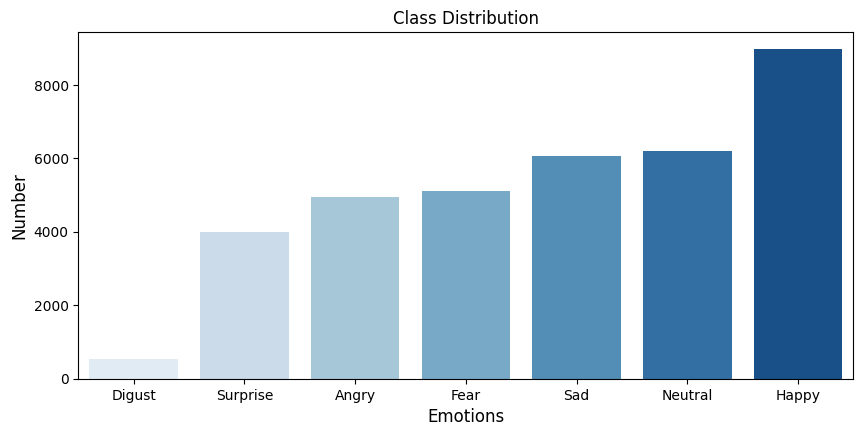

In [ ]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

# **Visualize the Emotions**

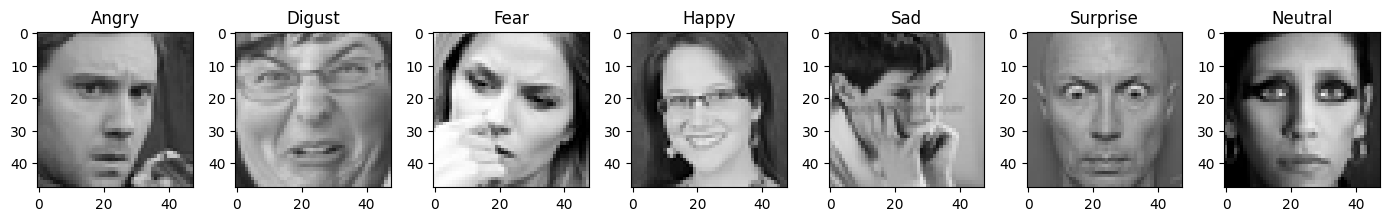

In [ ]:
def row2image(row):
    pixels = row['pixels']
    emotion = emotion_labels[row['emotion']]
    img = np.array(pixels.split(), dtype=np.uint8)
    img = img.reshape(48, 48)
    image = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    return image, emotion

plt.figure(figsize=(14,9))
for i in range(1, 8):
    face = data[data['emotion'] == i-1].iloc[0]
    img, emotion = row2image(face)
    plt.subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
plt.tight_layout()
plt.show()

# **Pre-processing Data**
1. **Splitting dataset into three parts: train, validation, test**
2. **Convert strings to lists of integers**
3. **Reshape to 48x48 and normalise grayscale image with 255.0**

In [ ]:
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


# **Visualize the Training Dataset**

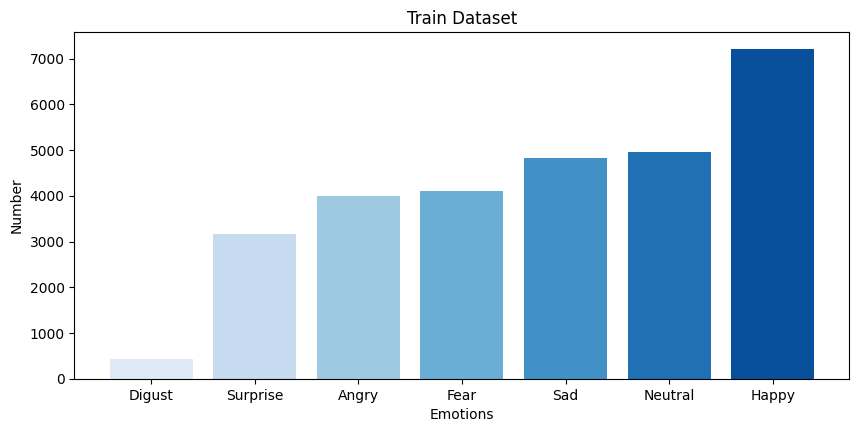

In [ ]:
train_emotion_counts_sorted = data_train['emotion'].value_counts().sort_values(ascending=True)

colors = sns.color_palette("Blues", n_colors=len(train_emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
plt.bar(range(len(train_emotion_counts_sorted)), train_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(train_emotion_counts_sorted)), [emotion_labels[i] for i in train_emotion_counts_sorted.index])
plt.title('Train Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()

# **Visuilize the Validation Dataset**

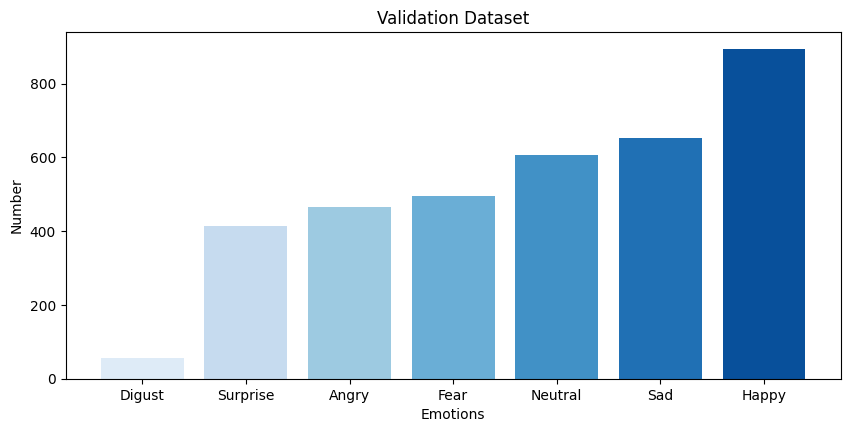

In [ ]:
val_emotion_counts_sorted = data_val['emotion'].value_counts().sort_values(ascending=True)

colors = sns.color_palette("Blues", n_colors=len(val_emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
plt.bar(range(len(val_emotion_counts_sorted)), val_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(val_emotion_counts_sorted)), [emotion_labels[i] for i in val_emotion_counts_sorted.index])
plt.title('Validation Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()

# **Visualize the Testing Dataset**

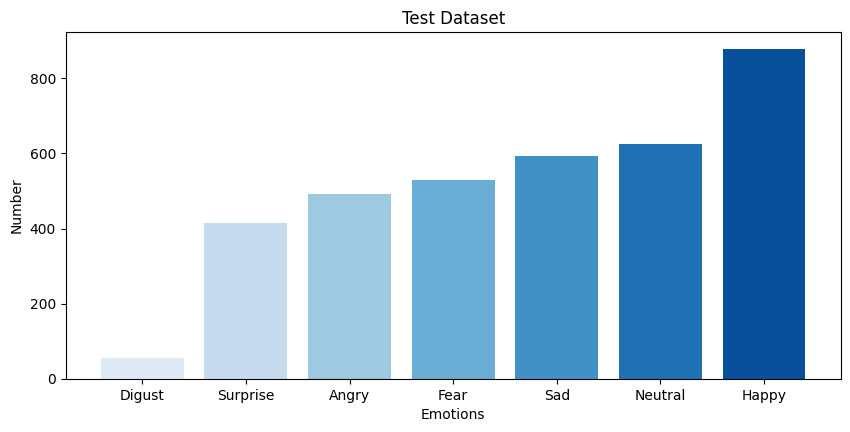

In [ ]:
test_emotion_counts_sorted = data_test['emotion'].value_counts().sort_values(ascending=True)

colors = sns.color_palette("Blues", n_colors=len(test_emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
plt.bar(range(len(test_emotion_counts_sorted)), test_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(test_emotion_counts_sorted)), [emotion_labels[i] for i in test_emotion_counts_sorted.index])
plt.title('Test Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()

In [ ]:
data["pixels"]

,pixels
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
35882,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,178 174 172 173 181 188 191 194 196 199 200 20...
35884,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [ ]:
x = []
for pixel_sequence in data["pixels"]:
    pixels = np.array(pixel_sequence.split(" "), dtype='uint8').reshape(48, 48, 1)
    x.append(pixels)
x = np.array(x) / 255.0
y = to_categorical(data["emotion"], num_classes = 7)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# **Build LeNet-5 Architecture**
**LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full connected layer.**
1. > Conv2D(6,(5,5)) -> Activation(Relu) -> Input_shape(48,48,1)
2. > Maxpooling(2,2)
3. > Conv2D(16,(5,5)) -> Activation(Relu)
4. > MaxPooling(2,2)
*  > Flatten()
5. > Dense(120) -> Activation(Relu)
6. > Dense(84) -> Activation(Relu)
7. > Dense(7)-> Activation(soft-Max)

**1. Convolutional layer:**
* Input picture: 48 * 48
* Convolution kernel size: 5 * 5
* Convolution kernel types: 6
* Output featuremap size: 44 * 44,(48-5 + 1) = 44
* Number of neurons: 44 * 44 * 6
* Trainable parameters: (5 * 5 + 1) * 6 = 156 -> (5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)
* Number of connections: (5 * 5 + 1) * 6 * 44 * 44 = 301016

**2. Maxpooling layer:**
* Input: 22 * 22
* Sampling area: 2 * 2
* Sampling type: 6
* Output featureMap size: 22 * 22, (22/2) = 12
* Number of neurons: 22 * 22 * 6
* Trainable parameters: 2 * 6 (the weight of the sum + the offset)
* Number of connections: (2 * 2 + 1) * 6 * 22 * 22
* The size of each feature map in S2 is 1/4 of the size of the feature map in C1

**3. Convolutional layer:**
* Input: all 6 or several feature map combinations in S2
* Convolution kernel size: 5 * 5
* Convolution kernel type: 16
* Output featureMap size: 22 * 22, (22-5 + 1) = 18
* The trainable parameters are: (5 * 5 * 6 + 1) * 16 = 2416
* Number of connections: 18 * 18 * 1516 = 782784

**4. Maxpooling layer:**
* Input: 18 * 18
* Sampling area: 2 * 2
* Sampling type: 16
* Output featureMap size: 9 * 9 (18/2)

**Flatten**

* Number of neurons: 9 * 9 * 16 = 1296

**5. Dense layer**
* Input: All 16 unit feature maps of the S4 layer (all connected to s4)
* Convolution kernel size: 5 * 5
* Convolution kernel type: 120
* Output featureMap size: 1 * 1 (5-5 + 1)
* Trainable parameters : 120 * (16 * 9 * 9 + 1) = 155640

**6. Fully connected layer**
* Input: 120-dimensional vector
* Calculation method: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the softmax function.
* Trainable parameters: 84 * (120 + 1) = 10164

**7. Output layer**
* Input: 84-neurons
* emotion_classes: 7
* Trainable Parameter: 7 * (84 + 1) = 595

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(48, 48, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (5, 5), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(104, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 44, 44, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │         194,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 104)                 │          15,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,561 (834.22 KB)

 Trainable params: 213,561 (834.22 KB)

 Non-trainable params: 0 (0.00 B)

# **Compiling the model**
**compile the model using the Adam optimizer with a learning rate of 0.001. Categorical crossentropy is chosen as the loss function, which is commonly used for multi-class classification problems. Accuracy is specified as the metric to monitor during training.**

* **'train_x' and 'train_y': are the input features and target labels for training, respectively.**
* **'epochs': specifies the number of epochs for training.**
* **'batch_size': determines the number of samples per gradient update.**
* **'validation_data': is a tuple (test_x, test_y) providing the validation data.**
* **'verbose': controls the verbosity of the training output. Setting verbose=1 means you'll see progress bars for each epoch.**

**The training history is stored in the history object, which can be used to visualize the training process.**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs = 30,
                    batch_size = 48,
                    validation_data = (test_x, test_y),
                    verbose=1)

Epoch 1/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.2990 - loss: 1.7259 - val_accuracy: 0.4150 - val_loss: 1.5267
Epoch 2/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.4268 - loss: 1.4905 - val_accuracy: 0.4412 - val_loss: 1.4320
Epoch 3/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.4680 - loss: 1.3716 - val_accuracy: 0.4674 - val_loss: 1.3711
Epoch 4/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 94s 92ms/step - accuracy: 0.5011 - loss: 1.2980 - val_accuracy: 0.4735 - val_loss: 1.3528
Epoch 5/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.5347 - loss: 1.2175 - val_accuracy: 0.4872 - val_loss: 1.3291
Epoch 6/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 98s 107ms/step - accuracy: 0.5658 - loss: 1.1469 - val_accuracy: 0.5070 - val_loss: 1.3010
Epoch 7/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5906 - loss: 1.0830 - val_accuracy: 0.5052 - val_loss: 1.3183
Epoch 8/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.6259 - loss: 0.9960 -

In [ ]:
df=pd.read_csv("/kaggle/input/loan-finder-data/final_data.csv")

In [ ]:
df

,Unnamed: 0,loan_len,Story,Image,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,...,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,purpose_Others,purpose_Restaurant,purpose_Retail,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,expected
0,0,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/620df2a0f8498acb...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,575
1,1,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/2bd1f94b70488503...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,700
2,2,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/e33f4c528c56743e...,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,425
3,3,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/5b5478dc833f83a2...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,300
4,4,24,I am the owner of my own beauty salon. I had ...,https://www.kiva.org/img/w960/9b596fe845794e99...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,6822,6,Doña Antonia is from San Luis Potosí. She has ...,https://www.kiva.org/img/w960/027509e29d269af4...,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,200
6653,6823,6,Maria is married and has a 6 year-old son. Her...,https://www.kiva.org/img/w960/639cbc77342726ef...,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,200
6654,6824,9,Lorenza is a widow and has four married childr...,https://www.kiva.org/img/w960/55ba54a93be8e502...,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,325
6655,6825,8,"Erika is from Tamaulipas, she is married and h...",https://www.kiva.org/img/w960/c3227ca030701318...,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,325


In [ ]:
image=df["Image"][3]

In [ ]:
url=str(image)

In [ ]:
url

'https://www.kiva.org/img/w960/5b5478dc833f83a27ccb30fd264c0646.jpg'

In [ ]:
HEADERS=({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'})
emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
with requests.get(url, headers=HEADERS, stream=True) as response:
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  image = image.convert('L')
  image = image.resize((48, 48))

  image_array = np.array(image) / 255.0

  image_array = np.expand_dims(image_array, axis=-1)
  image_array = np.expand_dims(image_array, axis=0)
  predictions = model.predict(image_array)

  index= np.argmax(predictions)
  print(emotion_labels[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Happy


In [ ]:
import requests

In [ ]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from io import BytesIO


emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
def emotion_check(url):
  url=str(url)
  try:
    with requests.get(url, headers=HEADERS, stream=True) as response:
      response = requests.get(url)
      image = Image.open(BytesIO(response.content))

      image = image.convert('L')

      image = image.resize((48, 48))

      image_array = np.array(image) / 255.0

      image_array = np.expand_dims(image_array, axis=-1)
      image_array = np.expand_dims(image_array, axis=0)
      predictions = model.predict(image_array)

      index= np.argmax(predictions)
      return emotion_labels[index]
  except:
    index= np.random.randint(0,6)
    return emotion_labels[index]

In [ ]:
from PIL import Image
import numpy as np
from io import BytesIO
import cv2

emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
lst=[]
for image in df["Image"]:
    lst.append(emotion_check(image))

In [ ]:
len(lst)

6657

In [ ]:
df["Emotion"]=pd.DataFrame(item for item in lst)

In [ ]:
df.to_csv("model1_data.csv")

In [ ]:
df

,Unnamed: 0,loan_len,Story,Image,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,...,purpose_Grocery Store,purpose_Home Products Sales,purpose_Others,purpose_Restaurant,purpose_Retail,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,expected,Emotion
0,0,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/620df2a0f8498acb...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,575,Happy
1,1,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/2bd1f94b70488503...,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,700,Sad
2,2,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/e33f4c528c56743e...,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,425,Sad
3,3,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/5b5478dc833f83a2...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,300,Happy
4,4,24,I am the owner of my own beauty salon. I had ...,https://www.kiva.org/img/w960/9b596fe845794e99...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,800,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,6822,6,Doña Antonia is from San Luis Potosí. She has ...,https://www.kiva.org/img/w960/027509e29d269af4...,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,200,Angry
6653,6823,6,Maria is married and has a 6 year-old son. Her...,https://www.kiva.org/img/w960/639cbc77342726ef...,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,200,Sad
6654,6824,9,Lorenza is a widow and has four married childr...,https://www.kiva.org/img/w960/55ba54a93be8e502...,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,325,Sad
6655,6825,8,"Erika is from Tamaulipas, she is married and h...",https://www.kiva.org/img/w960/c3227ca030701318...,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,325,Angry


In [ ]:
df["Emotion"].value_counts()

,count
Emotion,
Neutral,1754
Sad,1711
Fear,1226
Happy,928
Angry,671
Surprise,337
Digust,30


# **Evaluate Test and Train Performance**

**1. Test Performance Evaluation:**

* Convert one-hot encoded test labels back to categorical labels using np.argmax.
* Predict the labels for the test data using the trained model.
* Compute the accuracy score for the test data using accuracy_score.
* Print the test accuracy.

**2. Train Performance Evaluation:**

* Convert one-hot encoded train labels back to categorical labels using np.argmax.
* Predict the labels for the train data using the trained model.
* Compute the accuracy score for the train data using accuracy_score.
* Print the train accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(test_y,axis=1)
test_pred = np.argmax(model.predict(test_x), axis = 1)
print("Test Accuracy {:.2f}".format(accuracy_score(test_true, test_pred)*100))

train_true = np.argmax(train_y,axis=1)
train_pred = np.argmax(model.predict(train_x), axis = 1)
print("Train Accuracy {:.2f}".format(accuracy_score(train_true, train_pred)*100))


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
Test Accuracy 48.94
898/898 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step
Train Accuracy 97.06


# **Visualize Training & Validation**

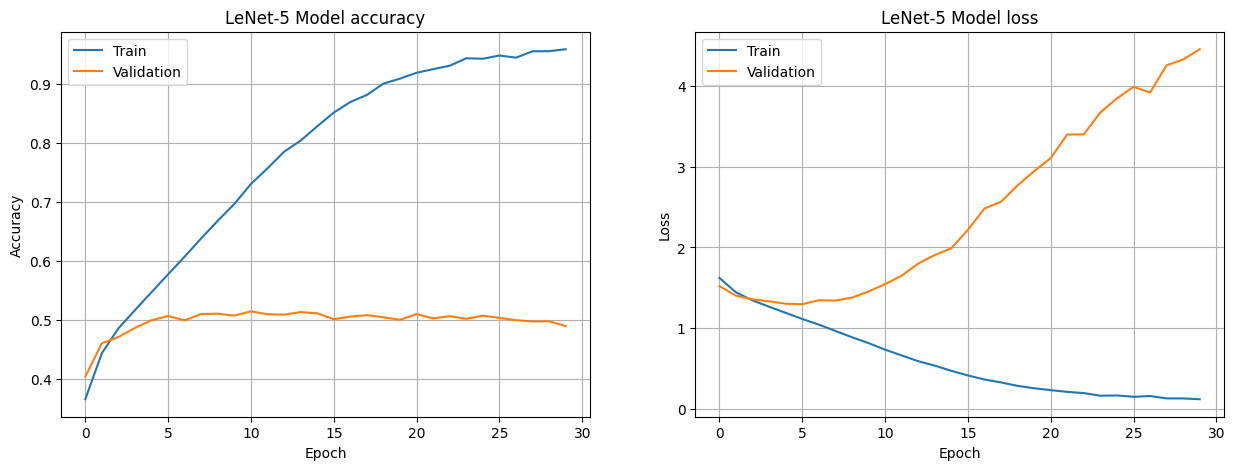

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LeNet-5 Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LeNet-5 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

# **Analysis using Confusion Matrix**

**The confusion matrix is calculated based on the predictions made by the model on the testing dataset. It compares the predicted labels against the true labels for each sample in the testing dataset. The rows of the matrix represent the true classes, while the columns represent the predicted classes. Each cell in the matrix shows the number (or proportion) of samples that were classified into a particular combination of true and predicted classes.**

**By analyzing the confusion matrix, you can gain insights into which classes the model is performing well on and which classes it's struggling with. This information can be valuable for fine-tuning the model or identifying areas for improvement.**

**In summary, there's no strict requirement for the sum of all classes in the confusion matrix to be exactly 100 or any other specific value. It depends on factors such as the dataset distribution, model performance, and whether the confusion matrix is normalized.**

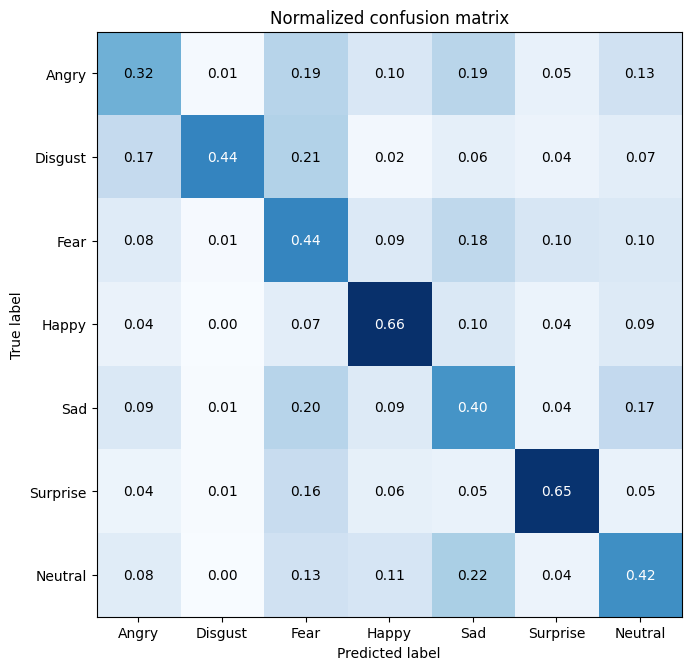

In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = emotion_labels
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=emotion_labels,
           yticklabels=emotion_labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate

report = classification_report(test_true, test_pred, target_names=emotion_labels)
title='Classification Report'
title_length = len(title)
header = f"{'':^{title_length}}\n{title:^{title_length}}\n"

print(header)
print(report)

                     
Classification Report

              precision    recall  f1-score   support

       Angry       0.43      0.32      0.37       985
     Disgust       0.52      0.44      0.48       102
        Fear       0.35      0.44      0.39      1043
       Happy       0.70      0.66      0.68      1765
         Sad       0.36      0.40      0.38      1210
    Surprise       0.61      0.65      0.63       795
     Neutral       0.46      0.42      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.49      0.48      0.48      7178
weighted avg       0.50      0.49      0.49      7178



In [ ]:
import time

def Sequential():
    time.sleep(2)

model_name = "LeNet-5"

start_time = time.time()
Sequential()
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time of {model_name}: {execution_time:.2f} seconds")


Execution time of LeNet-5: 2.00 seconds


# **Save the model as output**

**It zips the contents of the 'directory_to_zip' into a zip file named 'Facial_Expression_Recognition.zip' and saves the model as 'Facial_Expression_Recognition.h5' in the current directory.**

In [ ]:
from keras.models import load_model
import shutil

directory_to_zip = '/kaggle/working/'

zip_file_name = '/kaggle/working/FER_CNN_LeNet-5'

shutil.make_archive(zip_file_name, 'zip', directory_to_zip)
model.save('/kaggle/working/FER_CNN_LeNet-5.h5')
